In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
class Model():

    def __init__(self, num_of_agents=10, num_iterations=10):
        
        self.num_iterations = num_iterations
        
        self.num_infected_per_iteration = []

    # Create the agents
        self.agents = [] # All agents in the model
        for i in range(num_of_agents):
            self.agents.append(Agent(self)) #adding each new created agent to a list
            
            self.model_finished = False #if the model hasn't finished running yet
    def get_num_infected(self):
        return len([ a for a in self.agents if a.state==1 ]) #if an agents state is = 1 then agent is infected
    
    def run(self):
        for t in range(self.num_iterations):
            for agent in self.agents:
                agent.step() #every agent, in every iteration, moves forward
            
            self.num_infected_per_iteration.append(self.get_num_infected()) #append each agent's state 
            
            print('step: {}, inf: {}'.format(t,self.get_num_infected()))
        
        self.model_finished = True #once each iteration is done, model is finished
    
    def graph_num_infected(self):
        """
        Uses matplotlib to create a graph
        """
        if not self.model_finished:
            print("Can't print the number of infected until the model has finished")
            return
        
        # Create a figure and an axis (if you want more than one plot in the same
        # figure you can adjust the subplots function)
        
        fig, ax = plt.subplots(num=None, figsize=(5, 3), dpi=128, facecolor='w', edgecolor='k')
        
        # Do a scatter plot
        ax.plot([i for i in range(self.num_iterations)], [i for i in self.num_infected_per_iteration], "o-",
                c="red", label="Number of infected")
        
        ax.set_title("Number of infected per iteration")
        ax.set_ylim(0,len(self.agents)) # limit the y axis
        ax.set_xlabel("Iteration (time)")
        ax.set_ylabel("Number of infected")
        ax.legend(loc='upper left')
        
        #plt.savefig("figs_for_pf_paper/benchmark-agents_vs_error.png", bbox_inches="tight")
        

In [7]:
class Agent():
    
    def __init__(self, model, alpha = 0.5, beta = 0.2, gamma = 0.3): #alpha=0.5, beta=0.2, gamma=0.3)

        # rates
        self.alpha = alpha #rate of spontaneous infection
        #self.beta = beta #transmission of infection
        self.gamma = gamma #recovery rate
       
    
        if random.random() <0.5:
            self.state = 1 #1 indicates an infected state
        else:
            self.state = 0 #0 indictaes a susceptible state
        
        
        self.susceptibility = (self.low_sus(), self.moderate_sus(), self.high_sus())
        
        if self.state = 0:
            if random.random() <0.5:
                self.susceptibility = self.low_sus()
            elif random.random() == 0.5:
                self.susceptibility = self.moderate_sus()
            else:
                self.susceptibility = self.high_sus()
        
    def self.low_sus(step):
        self.beta = 0.2
        
    def self.moderate_sus(step):
        self.beta = 0.5
        
    def self.high_sus(step):
        self.beta = 0.9
        
        
        # pointer to the model
        self.model = model
           
    def step(self):
        if self.state == 0:
            self.become_infected()
        else:
            self.recover()
            # print(self.state)
    
    def become_infected(self):
        num_infected = model.get_num_infected() #calls function that gets number of infected agents
        likelihood = self.alpha + (num_infected * self.beta) #the likelihood of infection depends on some spontaneous rate of infection, 
                                                             #and the number of already infected and the infection tranmission rate 
         
        #drawing a random number to decide whether the agent gets infected, given it likelihood
        r = random.random()
        if r < likelihood:
            self.state = 1
    
    def recover(self):
        r1 = random.random()
        if r1 < self.gamma:
            self.state = 0

step: 0, inf: 10
step: 1, inf: 4
step: 2, inf: 9
step: 3, inf: 7
step: 4, inf: 8
step: 5, inf: 8
step: 6, inf: 6
step: 7, inf: 8
step: 8, inf: 7
step: 9, inf: 6
step: 0, inf: 80
step: 1, inf: 75
step: 2, inf: 86
step: 3, inf: 76
step: 4, inf: 83
step: 5, inf: 69
step: 6, inf: 80
step: 7, inf: 81
step: 8, inf: 73
step: 9, inf: 76
step: 0, inf: 843
step: 1, inf: 749
step: 2, inf: 777
step: 3, inf: 759
step: 4, inf: 765
step: 5, inf: 770
step: 6, inf: 760
step: 7, inf: 781
step: 8, inf: 769
step: 9, inf: 778


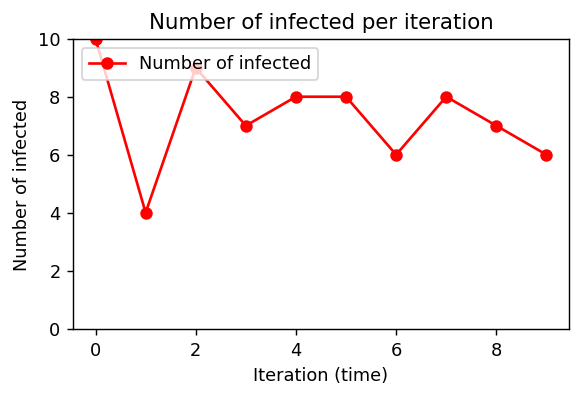

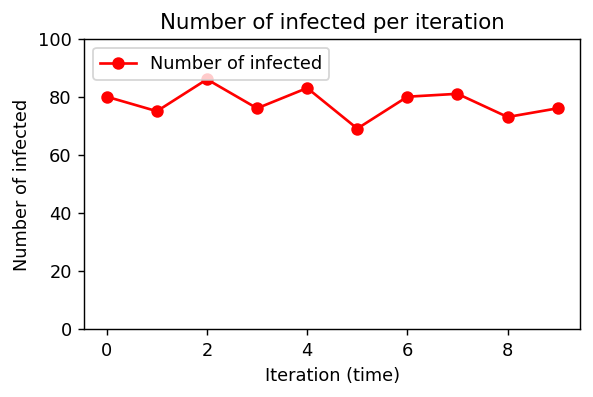

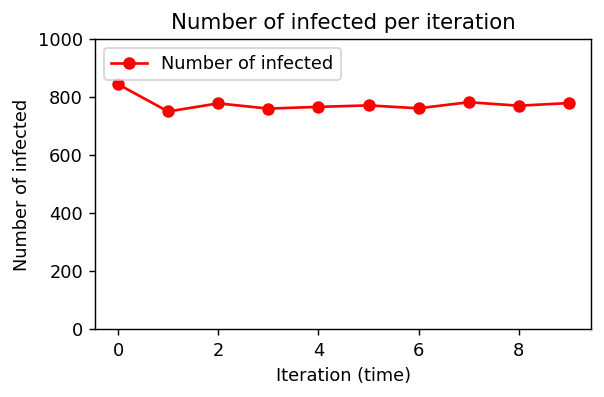

In [8]:
# Run the model
if __name__ == "__main__":
    model = Model(num_of_agents=10, num_iterations=10)
    model.run()
    model.graph_num_infected()
    model = Model(num_of_agents=100, num_iterations=10)
    model.run()
    model.graph_num_infected()
    model = Model(num_of_agents=1000, num_iterations=10)
    model.run()
    model.graph_num_infected()